Data loaded successfully and column names stripped of extra spaces.

Cleaned Column Names:
Index(['Subject Id', 'Subject name', 'Subject Sex', 'Site', 'Trial: ID',
       'Trial: Sequence', 'Trial: Name', 'Trial: Starting Time (ms)',
       'Trial: Duration (ms)', 'Mouse: Left Clicks (count)',
       'Mouse: Left Clicks (count/s)', 'Mouse: Right Clicks (count)',
       'Mouse: Right Clicks (count/s)',
       'Mouse: Fixations Until First Click (count)',
       'Mouse: Time Until First Click (ms)', 'Mouse: Pathlength (px)',
       'Mouse: Path velocity (px/s)', 'Mouse: Average Saccade Velocity (px/s)',
       'TrialDurSec', 'success'],
      dtype='object')

--- Data Preprocessing ---

Unique values in website identifier column 'Site': ['s' 'i']
Mapping values in 'Site' using: {'s': 'smallpdf', 'i': 'ilovepdf'}
Using column 'website' for analysis. Unique values: ['smallpdf' 'ilovepdf']
Ensured 'TrialDurSec' (Time in seconds) is numeric.
Ensured 'Mouse: Left Clicks (count)' and 'Mouse: P

C:\Users\User\AppData\Local\Temp\ipykernel_6504\2218759749.py:520: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_6504\2218759749.py:520: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_6504\2218759749.py:520: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_6504\2218759749.py:489: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

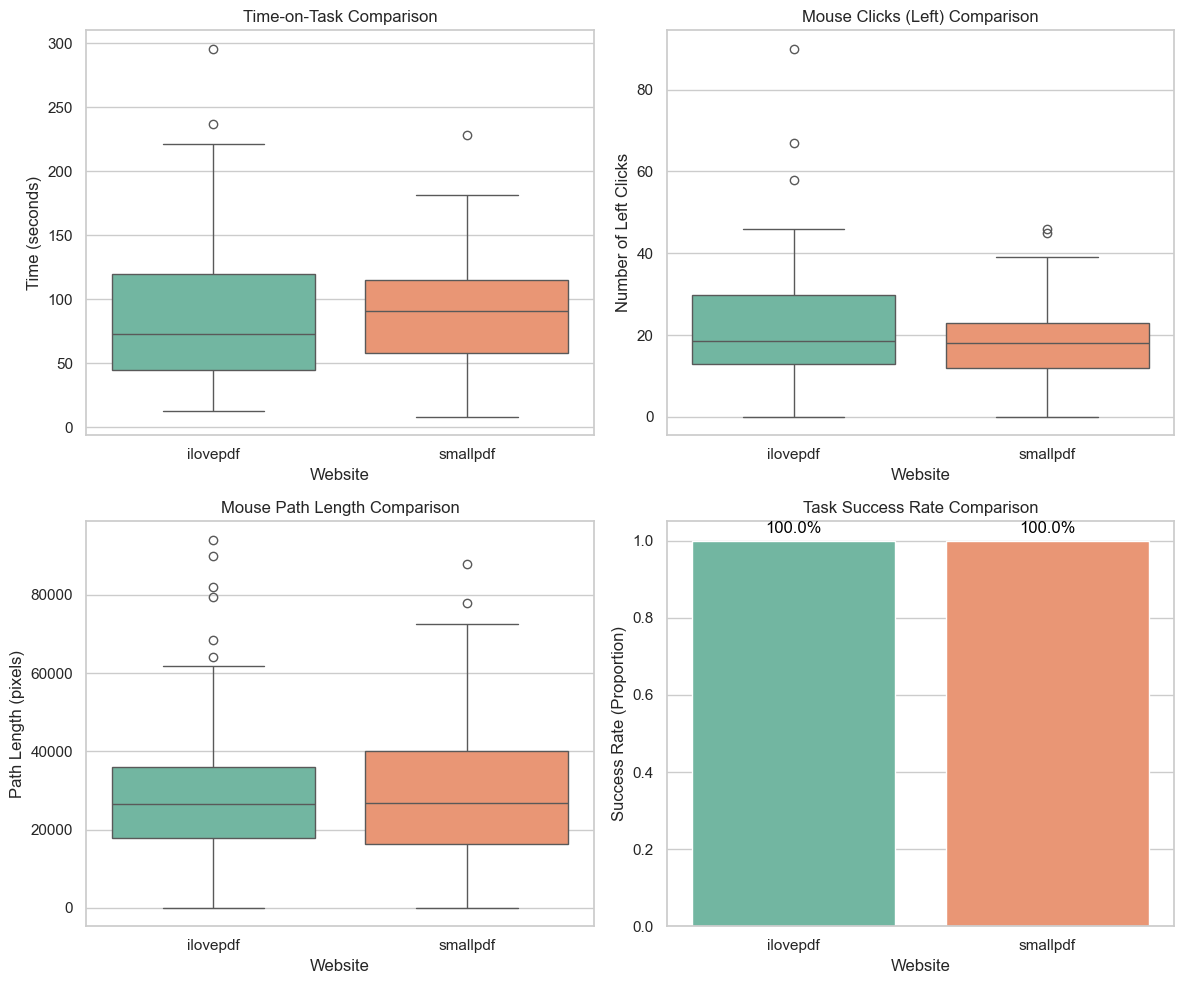


--- Summary of Statistical Results (alpha = 0.05) ---
                            n1  n2                 test statistic p_value  \
Time-on-Task (s)            70  77       Mann-Whitney U  2476.000  0.3967   
Mouse Clicks                70  77       Mann-Whitney U  2905.000  0.4162   
Mouse Path Length (pixels)  70  77       Mann-Whitney U  2642.500  0.8402   
Task Success Rate           70  77  Fisher's Exact Test       N/A  1.0000   

                           significant  
Time-on-Task (s)                 False  
Mouse Clicks                     False  
Mouse Path Length (pixels)       False  
Task Success Rate                False  

--- Interpretation ---

Time-on-Task (s):
  - No significant difference found between the websites (Test: Mann-Whitney U, p = 0.3967404742492323).
  - Interpretation: No evidence to suggest one is easier than the other based on this metric.

Mouse Clicks:
  - No significant difference found between the websites (Test: Mann-Whitney U, p = 0.41621918301

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os

# --- 1. Load Data ---
file_path = "export_ogama_csv_fitlered_3.csv"
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found in the current directory.")
    # Exit or handle the error appropriately
    exit()  # Or raise an exception

try:
    # Read the CSV, paying attention to potential extra spaces in column names
    df = pd.read_csv(file_path)
    # Clean column names: remove leading/trailing spaces
    df.columns = df.columns.str.strip()
    print("Data loaded successfully and column names stripped of extra spaces.")

    # Display cleaned column names
    print("\nCleaned Column Names:")
    print(df.columns)
    # Display basic info
    # print("\nData Info:")
    # df.info()
    # Display first few rows
    # print("\nData Head:")
    # print(df.head())

    # --- CORRECTED: Identify relevant columns based on user feedback ---
    col_website_id = "Site"  # <<<--- CORRECTED: Column for website identifier
    col_time = "TrialDurSec"  # <<<--- CORRECTED: Already in seconds
    col_clicks = "Mouse: Left Clicks (count)"  # <<<--- CORRECTED: Using left clicks
    col_path = "Mouse: Pathlength (px)"  # <<<--- CORRECTED: Path length in pixels
    col_success = "success"  # <<<--- CORRECTED: Success indicator (likely 0/1)

    # --- 2. Preprocessing ---
    print("\n--- Data Preprocessing ---")

    # Verify required columns exist after cleaning names
    required_cols = [col_website_id, col_time, col_clicks, col_path, col_success]
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(
            f"Missing required columns after cleaning: {missing_cols}. Please double-check the file and column list."
        )

    # --- Handle Website Identifier ---
    # Check unique values in the website column to determine mapping
    print(
        f"\nUnique values in website identifier column '{col_website_id}': {df[col_website_id].unique()}"
    )
    # !!! ACTION REQUIRED: Adjust the mapping below based on the printed unique values !!!
    # Example: If 's' means smallpdf and 'i' means ilovepdf:
    website_map = {"s": "smallpdf", "i": "ilovepdf"}  # <<<--- ADJUST THIS MAP if needed

    # Apply mapping or direct assignment
    if all(val in website_map for val in df[col_website_id].unique()):
        print(f"Mapping values in '{col_website_id}' using: {website_map}")
        df["website"] = df[col_website_id].map(website_map)
    elif all(
        val in ["smallpdf", "ilovepdf"]
        for val in df[col_website_id].str.lower().unique()
    ):
        print(f"Using values in '{col_website_id}' directly (converting to lowercase).")
        df["website"] = df[col_website_id].str.lower()
    else:
        # If mapping doesn't work, raise an error or try extracting
        # For now, assume direct use might work if values are clear, otherwise raise error
        unique_sites = df[col_website_id].unique()
        if "smallpdf" in [str(s).lower() for s in unique_sites] and "ilovepdf" in [
            str(s).lower() for s in unique_sites
        ]:
            print(
                f"Attempting direct extraction of 'ilovepdf'/'smallpdf' from '{col_website_id}'."
            )

            def extract_website(identifier):
                identifier_str = str(identifier).lower()
                if "ilovepdf" in identifier_str:
                    return "ilovepdf"
                elif "smallpdf" in identifier_str:
                    return "smallpdf"
                else:
                    return None

            df["website"] = df[col_website_id].apply(extract_website)
        else:
            raise ValueError(
                f"Could not automatically determine website names from column '{col_website_id}' with values {unique_sites}. Please adjust the 'website_map' in the script."
            )

    col_website = "website"  # Use the new standardized column
    print(
        f"Using column '{col_website}' for analysis. Unique values: {df[col_website].unique()}"
    )

    # Remove rows where website couldn't be identified
    initial_rows = len(df)
    df.dropna(subset=[col_website], inplace=True)
    if len(df) < initial_rows:
        print(
            f"Removed {initial_rows - len(df)} rows with unrecognized website identifiers."
        )
    if df[col_website].nunique() < 2:
        raise ValueError(
            f"Could not identify two distinct websites ('ilovepdf', 'smallpdf') in column '{col_website_id}'. Check data and mapping/extraction logic."
        )

    # --- Convert Numeric Columns ---
    # Time is already in seconds (col_time = 'TrialDurSec')
    df[col_time] = pd.to_numeric(df[col_time], errors="coerce")
    print(f"Ensured '{col_time}' (Time in seconds) is numeric.")

    # Ensure clicks and path length are numeric
    df[col_clicks] = pd.to_numeric(df[col_clicks], errors="coerce")
    df[col_path] = pd.to_numeric(df[col_path], errors="coerce")
    print(f"Ensured '{col_clicks}' and '{col_path}' are numeric.")

    # --- Standardize Success Column ---
    # Check unique values first
    print(
        f"\nUnique values in success column '{col_success}': {df[col_success].unique()}"
    )
    # Assuming it's already 0/1 based on dtype int64, but verify
    df[col_success] = pd.to_numeric(df[col_success], errors="coerce")
    if not df[col_success].isin([0, 1]).all():
        # If not 0/1, attempt mapping (add expected values to map)
        print(
            f"Warning: Column '{col_success}' contains values other than 0 or 1. Attempting mapping."
        )
        success_map = {
            1: 1,
            "1": 1,
            "success": 1,
            "Success": 1,  # Success values
            0: 0,
            "0": 0,
            "failure": 0,
            "Failure": 0,
        }  # Failure values
        df[col_success] = df[col_success].map(success_map)
        if df[col_success].isnull().any():
            raise ValueError(
                f"Could not map all values in column '{col_success}' to 0 or 1. Please check data and 'success_map'."
            )
    print(f"Ensured '{col_success}' is numeric (0 or 1).")

    # --- Handle Missing Values ---
    # Drop rows where any of the key metrics are missing after conversion
    cols_to_check_na = [col_website, col_time, col_clicks, col_path, col_success]
    print(f"\nMissing values before final drop:\n{df[cols_to_check_na].isnull().sum()}")
    initial_rows = len(df)
    df.dropna(subset=cols_to_check_na, inplace=True)
    if len(df) < initial_rows:
        print(
            f"Removed {initial_rows - len(df)} rows with missing values in key metric columns."
        )
    print(f"Final data shape after preprocessing: {df.shape}")

    # Ensure 'success' is integer after dropping NAs
    df[col_success] = df[col_success].astype(int)

    # --- Separate data for each website ---
    df_ilovepdf = df[df[col_website] == "ilovepdf"].copy()
    df_smallpdf = df[df[col_website] == "smallpdf"].copy()

    if df_ilovepdf.empty or df_smallpdf.empty:
        raise ValueError(
            "Data for one or both websites is missing after preprocessing. Check filters and website identifiers ('Site' column mapping)."
        )

    print(
        f"\nData separated: {len(df_ilovepdf)} valid entries for ilovepdf, {len(df_smallpdf)} valid entries for smallpdf."
    )

    # --- 3. Descriptive Statistics ---
    print("\n--- Descriptive Statistics ---")
    metrics_cols = [col_time, col_clicks, col_path, col_success]
    # Define aggregations including count
    agg_funcs = ["mean", "median", "std", "min", "max", "count"]
    desc_stats = df.groupby(col_website)[metrics_cols].agg(agg_funcs)

    # Rename success rate mean for clarity
    desc_stats.rename(columns={"mean": "Success Rate"}, level=1, inplace=True)
    # Display success rate as percentage in a separate step for presentation if needed
    desc_stats_display = desc_stats.copy()
    if "Success Rate" in desc_stats_display[col_success].columns:
        desc_stats_display[(col_success, "Success Rate")] = desc_stats_display[
            (col_success, "Success Rate")
        ].apply(lambda x: f"{x:.2%}")

    print("--- Continuous Metrics ---")
    print(desc_stats_display[[col_time, col_clicks, col_path]])
    print("\n--- Task Success ---")
    print(desc_stats_display[col_success])

    # --- 4. Statistical Testing ---
    print("\n--- Statistical Testing (Significance level alpha = 0.05) ---")
    results = {}
    alpha = 0.05

    # Function to check normality
    def check_normality(data, name):
        if len(data) < 3:  # Shapiro test requires at least 3 samples
            print(f"  Normality check skipped for {name} (sample size < 3)")
            return False  # Assume not normal for safety if too small
        shapiro_test = stats.shapiro(data)
        print(
            f"  Shapiro-Wilk normality test ({name}): W={shapiro_test.statistic:.4f}, p={shapiro_test.pvalue:.4f}"
        )
        is_normal = shapiro_test.pvalue > alpha
        print(
            f"  -> {'Normal distribution assumed' if is_normal else 'Normal distribution NOT assumed'}"
        )
        return is_normal

    # Function for comparing continuous metrics
    def compare_continuous(metric_col, label):
        print(f"\n--- Comparing '{label}' ({metric_col}) ---")
        data1 = df_ilovepdf[metric_col]
        data2 = df_smallpdf[metric_col]

        # Check sample sizes before proceeding
        n1, n2 = len(data1), len(data2)
        print(f"  Sample sizes: ilovepdf (n={n1}), smallpdf (n={n2})")
        if n1 < 2 or n2 < 2:
            print("  Skipping comparison: Insufficient data for one or both groups.")
            results[label] = {
                "test": "Skipped",
                "statistic": np.nan,
                "p_value": np.nan,
                "significant": "N/A",
                "n1": n1,
                "n2": n2,
            }
            return

        # Check normality
        normality1 = check_normality(data1, f"ilovepdf")
        normality2 = check_normality(data2, f"smallpdf")

        test_type = "N/A"
        p_value = np.nan
        statistic = np.nan

        if normality1 and normality2:
            # Check homogeneity of variances if normal
            levene_test = stats.levene(data1, data2)
            print(
                f"  Levene's test for equal variances: W={levene_test.statistic:.4f}, p={levene_test.pvalue:.4f}"
            )
            equal_var = levene_test.pvalue > alpha
            print(
                f"  -> {'Equal variances assumed' if equal_var else 'Equal variances NOT assumed'}"
            )
            # Perform T-test
            ttest_result = stats.ttest_ind(
                data1, data2, equal_var=equal_var, nan_policy="omit"
            )
            print(
                f"  Independent Samples t-test: t={ttest_result.statistic:.4f}, p={ttest_result.pvalue:.4f}"
            )
            test_type = "t-test"
            statistic = ttest_result.statistic
            p_value = ttest_result.pvalue
        else:
            if not normality1 or not normality2:
                print(
                    "  -> Using non-parametric test (Mann-Whitney U) due to non-normality."
                )
            # Perform Mann-Whitney U test
            try:
                # Ensure data has variance before MWU test
                if (
                    data1.nunique() <= 1
                    and data2.nunique() <= 1
                    and data1.iloc[0] == data2.iloc[0]
                ):
                    print(
                        "  Skipping Mann-Whitney U test: Data has no variance or groups are identical."
                    )
                    test_type = "Skipped (No Variance/Identical)"
                else:
                    mwu_result = stats.mannwhitneyu(
                        data1, data2, alternative="two-sided", nan_policy="omit"
                    )
                    print(
                        f"  Mann-Whitney U test: U={mwu_result.statistic:.4f}, p={mwu_result.pvalue:.4f}"
                    )
                    test_type = "Mann-Whitney U"
                    statistic = mwu_result.statistic
                    p_value = mwu_result.pvalue
            except ValueError as e:
                print(
                    f"  Could not perform Mann-Whitney U test: {e}"
                )  # e.g., if all values are identical in a way MWU cannot handle

        significant = p_value < alpha if not np.isnan(p_value) else "N/A"
        results[label] = {
            "test": test_type,
            "statistic": statistic,
            "p_value": p_value,
            "significant": significant,
            "n1": n1,
            "n2": n2,
        }
        if significant == True:
            direction = "higher" if data1.mean() > data2.mean() else "lower"
            print(
                f"  Result: Statistically significant difference found (p < {alpha}). Mean for ilovepdf is {direction} than smallpdf."
            )
        elif significant == False:
            print(
                f"  Result: No statistically significant difference found (p >= {alpha})."
            )
        else:
            print("  Result: Could not determine significance.")

    # Compare continuous metrics
    compare_continuous(col_time, "Time-on-Task (s)")
    compare_continuous(col_clicks, "Mouse Clicks")
    compare_continuous(col_path, "Mouse Path Length (pixels)")

    # --- Compare Task Success Rate (Categorical) ---
    print(f"\n--- Comparing 'Task Success Rate' ({col_success}) ---")
    # Create contingency table [index: website, columns: success (0/1)]
    contingency_table = pd.crosstab(df[col_website], df[col_success])
    print("  Contingency Table (Rows: Website, Columns: 0=Failure, 1=Success):")
    # Ensure columns 0 and 1 exist, add if missing with 0 counts
    if 0 not in contingency_table.columns:
        contingency_table[0] = 0
    if 1 not in contingency_table.columns:
        contingency_table[1] = 0
    contingency_table = contingency_table[[0, 1]]  # Ensure correct order
    print(contingency_table)

    test_type = "N/A"
    p_value = np.nan
    statistic = np.nan
    significant = "N/A"
    n1 = (
        contingency_table.loc["ilovepdf"].sum()
        if "ilovepdf" in contingency_table.index
        else 0
    )
    n2 = (
        contingency_table.loc["smallpdf"].sum()
        if "smallpdf" in contingency_table.index
        else 0
    )
    print(f"  Sample sizes: ilovepdf (n={n1}), smallpdf (n={n2})")

    # Check if table is valid for chi-squared (at least 2x2 with non-zero counts)
    if (
        contingency_table.shape == (2, 2)
        and contingency_table.sum().sum() > 0
        and n1 > 0
        and n2 > 0
    ):
        try:
            # Check for zero cells which might invalidate chi-squared but ok for Fisher
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            print(f"  Chi-squared test: chi2={chi2:.4f}, p={p:.4f}, df={dof}")
            test_type = "Chi-squared"
            statistic = chi2
            p_value = p
            # Check for low expected frequencies
            if (expected < 5).any().any():
                print(
                    "  Warning: Expected frequencies < 5. Chi-squared may be inaccurate. Performing Fisher's Exact Test."
                )
                try:
                    oddsr, p_fisher = stats.fisher_exact(contingency_table)
                    print(
                        f"  Fisher's Exact Test: OddsRatio={oddsr:.4f}, p={p_fisher:.4f}"
                    )
                    # Use Fisher's p-value if computed and potentially more appropriate
                    p_value = p_fisher
                    test_type = "Fisher's Exact Test"
                    statistic = oddsr  # Report odds ratio for Fisher's
                except ValueError as e:
                    print(
                        f"  Could not perform Fisher's Exact Test: {e}"
                    )  # Should not happen for 2x2
            else:
                print(
                    "  Expected frequencies >= 5. Chi-squared results are likely reliable."
                )

        except ValueError as e:
            # This might happen if a row/column sum is zero
            print(
                f"  Could not perform Chi-squared test: {e}. Attempting Fisher's Exact Test."
            )
            try:
                oddsr, p_fisher = stats.fisher_exact(contingency_table)
                print(f"  Fisher's Exact Test: OddsRatio={oddsr:.4f}, p={p_fisher:.4f}")
                p_value = p_fisher
                test_type = "Fisher's Exact Test"
                statistic = oddsr
            except ValueError as e_fish:
                print(f"  Could not perform Fisher's Exact Test either: {e_fish}")

    else:
        print(
            "  Skipping Chi-squared/Fisher's test: Contingency table is not 2x2 or has zero counts for a group."
        )
        test_type = "Skipped"

    # Determine significance based on the final p-value obtained
    if not np.isnan(p_value):
        significant = p_value < alpha

    results["Task Success Rate"] = {
        "test": test_type,
        "statistic": statistic,
        "p_value": p_value,
        "significant": significant,
        "n1": n1,
        "n2": n2,
    }

    if significant == True:
        # Calculate success rates directly from the table for accuracy
        success_rate_ilovepdf = (
            contingency_table.loc["ilovepdf", 1] / n1 if n1 > 0 else 0
        )
        success_rate_smallpdf = (
            contingency_table.loc["smallpdf", 1] / n2 if n2 > 0 else 0
        )
        direction = (
            "higher" if success_rate_ilovepdf > success_rate_smallpdf else "lower"
        )
        print(
            f"  Result: Statistically significant difference found (p < {alpha}). Success rate for ilovepdf ({success_rate_ilovepdf:.2%}) is {direction} than smallpdf ({success_rate_smallpdf:.2%})."
        )
    elif significant == False:
        print(
            f"  Result: No statistically significant difference found (p >= {alpha})."
        )
    else:
        print("  Result: Could not determine significance.")

    # --- 5. Visualization ---
    print("\n--- Generating Visualizations ---")
    sns.set(style="whitegrid")

    # Define plot titles and labels dynamically
    plot_titles = {
        col_time: "Time-on-Task Comparison",
        col_clicks: "Mouse Clicks (Left) Comparison",
        col_path: "Mouse Path Length Comparison",
        col_success: "Task Success Rate Comparison",
    }
    plot_ylabels = {
        col_time: "Time (seconds)",
        col_clicks: "Number of Left Clicks",
        col_path: "Path Length (pixels)",
        col_success: "Success Rate (Proportion)",
    }

    metrics_to_plot = [col_time, col_clicks, col_path, col_success]
    num_plots = len(metrics_to_plot)
    n_cols = 2
    n_rows = int(np.ceil(num_plots / n_cols))
    plt.figure(
        figsize=(6 * n_cols, 5 * n_rows)
    )  # Adjust layout based on number of plots

    plot_index = 1
    for metric in metrics_to_plot:
        plt.subplot(n_rows, n_cols, plot_index)
        if metric == col_success:
            # Bar Plot for Task Success Rate
            # Calculate success rates directly for plotting
            if (
                "ilovepdf" in df[col_website].unique()
                and "smallpdf" in df[col_website].unique()
            ):
                success_rates_df = (
                    df.groupby(col_website)[col_success].mean().reset_index()
                )
                if not success_rates_df.empty:
                    sns.barplot(
                        x=col_website,
                        y=col_success,
                        data=success_rates_df,
                        palette="Set2",
                        order=["ilovepdf", "smallpdf"],
                    )
                    plt.title(plot_titles[metric])
                    plt.xlabel("Website")
                    plt.ylabel(plot_ylabels[metric])
                    plt.ylim(0, 1.05)  # Set y-axis from 0 to 100%

                    # Add text labels for success rates
                    for index, row in success_rates_df.iterrows():
                        # Find the correct x-position based on the order
                        x_pos = ["ilovepdf", "smallpdf"].index(row[col_website])
                        plt.text(
                            x_pos,
                            row[col_success] + 0.02,
                            f"{row[col_success]:.1%}",
                            color="black",
                            ha="center",
                        )
                else:
                    plt.title(f"{plot_titles[metric]}\n(No data to plot)")
            else:
                plt.title(f"{plot_titles[metric]}\n(Missing data for one/both sites)")

        else:
            # Box Plot for Continuous Metrics
            if df[metric].nunique() > 1:  # Avoid plotting if only one value
                sns.boxplot(
                    x=col_website,
                    y=metric,
                    data=df,
                    palette="Set2",
                    order=["ilovepdf", "smallpdf"],
                )
                # Add mean points for reference (optional)
                # sns.stripplot(x=col_website, y=metric, data=df, color='black', size=3, jitter=False, alpha=0.3, order=['ilovepdf', 'smallpdf'])
            else:
                # Fallback to stripplot if boxplot fails due to no variance
                sns.stripplot(
                    x=col_website,
                    y=metric,
                    data=df,
                    palette="Set2",
                    order=["ilovepdf", "smallpdf"],
                )
                print(f"Note: Used stripplot for {metric} due to low variance.")

            plt.title(plot_titles[metric])
            plt.xlabel("Website")
            plt.ylabel(plot_ylabels[metric])

        plot_index += 1

    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plots

    # --- 6. Summary of Results ---
    print("\n--- Summary of Statistical Results (alpha = 0.05) ---")
    summary_df = pd.DataFrame(results).T
    # Format p-values and statistics for readability
    summary_df["p_value"] = summary_df["p_value"].apply(
        lambda x: f"{x:.4f}" if pd.notna(x) else "N/A"
    )
    summary_df["statistic"] = summary_df["statistic"].apply(
        lambda x: f"{x:.3f}" if pd.notna(x) else "N/A"
    )
    print(summary_df[["n1", "n2", "test", "statistic", "p_value", "significant"]])

    print("\n--- Interpretation ---")
    # Provide interpretation based on results and usability principles
    # (Lower time, clicks, path = better; Higher success rate = better)
    usability_comparison = {}  # Store which website performed better

    for metric_label, result in results.items():
        stat_sig = result.get("significant", "N/A")
        p_val_str = result.get("p_value", "N/A")  # Get formatted p-value string
        test_used = result.get("test", "N/A")
        print(f"\n{metric_label}:")

        # Check if test was skipped before interpreting significance
        if test_used.startswith("Skipped"):
            print(
                f"  - Statistical comparison was skipped ({test_used}). Cannot determine significance."
            )
            usability_comparison[metric_label] = "Inconclusive (Skipped)"
            continue  # Skip to next metric

        # Proceed with interpretation if test was run
        if stat_sig == True:
            print(
                f"  - Significant difference found (Test: {test_used}, p = {p_val_str})."
            )
            # Find the actual column name mapped to this label
            metric_col = [k for k, v in plot_titles.items() if v == metric_label][0]
            mean1 = df_ilovepdf[metric_col].mean()
            mean2 = df_smallpdf[metric_col].mean()
            median1 = df_ilovepdf[metric_col].median()
            median2 = df_smallpdf[metric_col].median()

            if (
                metric_label != "Task Success Rate Comparison"
            ):  # Time, Clicks, Path: Lower is better
                direction = "higher" if mean1 > mean2 else "lower"
                better_site = "smallpdf" if mean1 > mean2 else "ilovepdf"
                worse_site = "ilovepdf" if mean1 > mean2 else "smallpdf"
                print(
                    f"  - Mean for {worse_site} was significantly {direction} ({mean1 if worse_site == 'ilovepdf' else mean2:.2f}) than {better_site} ({mean2 if worse_site == 'ilovepdf' else mean1:.2f})."
                )
                # Mention median if non-parametric test was used or if means/medians differ notably
                if (
                    test_used == "Mann-Whitney U"
                    or (mean1 != 0 and abs(mean1 - median1) / mean1 > 0.1)
                    or (mean2 != 0 and abs(mean2 - median2) / mean2 > 0.1)
                ):  # Basic check for skewness impact
                    median_direction = "higher" if median1 > median2 else "lower"
                    print(
                        f"  - Median for {worse_site} was also {median_direction} ({median1 if worse_site == 'ilovepdf' else median2:.2f}) compared to {better_site} ({median2 if worse_site == 'ilovepdf' else median1:.2f})."
                    )
                print(
                    f"  - Interpretation: {better_site} appears easier/more efficient for this metric."
                )
                usability_comparison[metric_label] = better_site
            else:  # Task Success Rate: Higher is better
                # Recalculate from contingency table for robustness
                n1_succ = contingency_table.loc["ilovepdf", 1]
                n1_total = contingency_table.loc["ilovepdf"].sum()
                n2_succ = contingency_table.loc["smallpdf", 1]
                n2_total = contingency_table.loc["smallpdf"].sum()
                success_rate1 = n1_succ / n1_total if n1_total > 0 else 0
                success_rate2 = n2_succ / n2_total if n2_total > 0 else 0

                better_site = (
                    "ilovepdf" if success_rate1 > success_rate2 else "smallpdf"
                )
                worse_site = "smallpdf" if success_rate1 > success_rate2 else "ilovepdf"
                print(
                    f"  - Success rate was significantly higher for {better_site} ({max(success_rate1, success_rate2):.2%}) compared to {worse_site} ({min(success_rate1, success_rate2):.2%})."
                )
                print(
                    f"  - Interpretation: Users were more successful on {better_site}."
                )
                usability_comparison[metric_label] = better_site

        elif stat_sig == False:
            print(
                f"  - No significant difference found between the websites (Test: {test_used}, p = {p_val_str})."
            )
            print(
                f"  - Interpretation: No evidence to suggest one is easier than the other based on this metric."
            )
            usability_comparison[metric_label] = "No difference"
        else:  # N/A case (e.g., test failed unexpectedly)
            print(
                f"  - Statistical test could not be performed reliably or results were inconclusive (Test: {test_used}, p = {p_val_str})."
            )
            usability_comparison[metric_label] = "Inconclusive (Error)"

    print("\n--- Overall Conclusion ---")
    ilovepdf_better_count = sum(
        1 for site in usability_comparison.values() if site == "ilovepdf"
    )
    smallpdf_better_count = sum(
        1 for site in usability_comparison.values() if site == "smallpdf"
    )
    no_diff_count = sum(
        1 for site in usability_comparison.values() if site == "No difference"
    )
    inconclusive_count = sum(
        1 for site in usability_comparison.values() if "Inconclusive" in site
    )  # Catches skipped/error

    print(f"Summary of findings based on statistical significance (alpha=0.05):")
    print(
        f" - Metrics where ilovepdf performed significantly better (easier/more efficient): {ilovepdf_better_count}"
    )
    print(
        f" - Metrics where smallpdf performed significantly better (easier/more efficient): {smallpdf_better_count}"
    )
    print(f" - Metrics with no significant difference found: {no_diff_count}")
    if inconclusive_count > 0:
        print(
            f" - Metrics where comparison was inconclusive or skipped: {inconclusive_count}"
        )

    # Generate an overall tendency statement
    if ilovepdf_better_count > smallpdf_better_count:
        print(
            "\nOverall Tendency: Based on the metrics with significant differences, ilovepdf tended to perform better, suggesting it might offer a generally easier or more efficient user experience for the tasks tested."
        )
    elif smallpdf_better_count > ilovepdf_better_count:
        print(
            "\nOverall Tendency: Based on the metrics with significant differences, smallpdf tended to perform better, suggesting it might offer a generally easier or more efficient user experience for the tasks tested."
        )
    else:  # Equal counts or only no differences/inconclusive
        if ilovepdf_better_count == 0 and smallpdf_better_count == 0:
            if no_diff_count > 0:
                print(
                    "\nOverall Tendency: The analysis did not find significant differences in usability between ilovepdf and smallpdf for the metrics where tests could be reliably performed."
                )
            else:  # Only inconclusive
                print(
                    "\nOverall Tendency: The analysis was largely inconclusive due to data limitations or test constraints preventing definitive comparisons."
                )
        else:  # Equal number of wins
            print(
                "\nOverall Tendency: The results are mixed. Each website demonstrated statistically significant advantages on different usability metrics. This suggests neither website is universally 'easier' across all aspects measured in this study."
            )

    print("\nRecommendations for Report:")
    print(
        " - Include the descriptive statistics table (mean, median, std, count, etc.)."
    )
    print(
        " - Report the results of each statistical test from the 'Summary of Statistical Results' table (sample sizes, test used, statistic value, p-value, significance)."
    )
    print(
        " - Present the generated plots (Box plots and Bar plot). Ensure axis labels and titles are clear."
    )
    print(
        " - Discuss the interpretation for each metric individually, clearly stating which website performed better if the difference was significant, and why (e.g., lower time is better)."
    )
    print(
        " - State the overall conclusion based on the synthesis of results, acknowledging any mixed findings or inconclusive tests."
    )
    print(
        " - Consider discussing *practical significance* alongside statistical significance. For example, is a statistically significant difference in clicks actually large enough to impact user experience?"
    )
    print(
        " - Mention any limitations, such as sample size, specific tasks tested, or metrics not included."
    )


except FileNotFoundError:
    # This handles the case where the file wasn't found initially
    # The message is printed at the beginning of the try block.
    pass
except ValueError as ve:
    print(f"\n--- Data Error ---")
    print(f"An error occurred during data processing or analysis: {ve}")
    print(
        "Please check the column mappings (especially 'website_map'), data types, and unique values in your CSV file."
    )
except KeyError as ke:
    print(f"\n--- Column Error ---")
    print(
        f"Column Error: The specified column '{ke}' was not found after cleaning names."
    )
    print(
        "Please verify the column names listed in the 'Cleaned Column Names' output against the names used in the script."
    )
except Exception as e:
    print(f"\n--- An Unexpected Error Occurred ---")
    print(f"Error details: {type(e).__name__}: {e}")
    import traceback

    traceback.print_exc()  # Print detailed traceback for debugging
